#### Load necessary python package

In [1]:
import numpy as np
import pandas as pd

#### Data Wrangling 
- Loading Data in Consumable format

In [4]:
# Load data in Jupyter notebook environment
data = pd.read_csv('salaryData.csv')

#### Data Exploration

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
# How many rows and columns?
data.shape

(31, 2)

In [7]:
# First glance of null value and data type in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
YearsExperience    31 non-null float64
Salary             31 non-null int64
dtypes: float64(1), int64(1)
memory usage: 576.0 bytes


In [8]:
# Measure of central Tendency and Spread
data.describe()

,YearsExperience,Salary
count,31.000000,31.000000
mean,5.525806,80002.903226
std,3.030618,34963.913711
min,1.100000,37731.000000
25%,3.200000,56799.500000
50%,4.900000,66029.000000
75%,8.050000,103442.000000
max,11.900000,200000.000000


In [9]:
# Let us visualize it
import matplotlib.pyplot as plot
plot.scatter(data['YearsExperience'], data['Salary'], color = 'red')
plot.title('Salary vs Experience')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

<Figure size 640x480 with 1 Axes>

#### Data Manipulation

In [10]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [11]:
# Create Independent variable
exp = data.iloc[:, 0].values


# Create dependent variable
salary = data.iloc[:, 1].values 

### 3. Sampling for training and validation data split

In [12]:
# Split the dataset into the training set and test set
# We're splitting the data in 80-20 % so out of 31 rows, 24 rows will go into the training set,
# and 7 rows will go into the testing set.

from sklearn.model_selection import train_test_split
expTrain, expVal, salaryTrain, salaryVal = train_test_split(exp, salary, test_size = 0.2, random_state = 0)

In [13]:
# 1D .. No.
print(expTrain.ndim)
expTrain.shape

1


(24,)

In [14]:
# Let us Check type
type(expTrain)

numpy.ndarray

In [15]:
# Reshape it to two dimension
expTrain = expTrain.reshape((24,1))

In [16]:
# Type is same
type(expTrain)

numpy.ndarray

In [17]:
expTrain.shape

(24, 1)

In [18]:
# Convert to Data Frame
expVal = pd.DataFrame(expVal)

In [19]:
expVal.shape

(7, 1)

### Let's start our First Machine Learning Model

#### Compare with our data



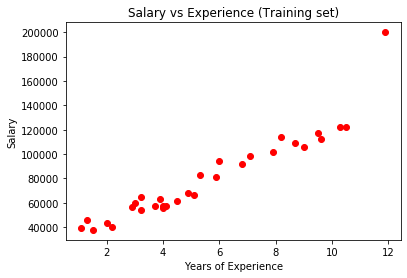

In [20]:
plot.scatter(data['YearsExperience'], data['Salary'], color = 'red')
plot.title('Salary vs Experience (Training set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

### salary = beta0 + beta1* YearsExperience + error 

### error = salary - ( beta0 + beta1* YearsExperience) 
#### Reduce error and get the optimum beta0 and beta1 and that's what machine learning do, try out different combinations and give best combination which gives minimum error

#### Finally when you know beta0 and beta1
<code>salary_predicted =  ( beta0 + beta1* YearsExperience)  </code>

### 4. Train your benchmark model

In [21]:
# Initialize class object
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()

In [22]:
# Train your model - It is this simple.!
linearRegressor.fit(expTrain, salaryTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(linearRegressor.coef_)
beta1 = linearRegressor.coef_

[11777.8286543]


In [24]:
print(linearRegressor.intercept_)
beta0 = linearRegressor.intercept_

17116.499330950654


#### <code>salary_predicted =  ( beta0 + beta1* YearsExperience)  </code>

### Training Done.

In [25]:
salary_predicted = linearRegressor.predict(expVal)

In [26]:
salary_predicted # Predicted

array([ 34783.24231241, 140783.70020115,  65405.5968136 ,  63050.03108274,
       130183.65441227, 123116.95721969, 110161.34569996])

In [27]:
expVal

,0
0,1.5
1,10.5
2,4.1
3,3.9
4,9.6
5,9.0
6,7.9


In [28]:
beta0 + beta1* 1.5 # Baseline Model Prediction

array([34783.24231241])

In [29]:
salaryVal # Actual

array([ 37731, 121872,  57081,  63218, 112635, 105582, 101302],
      dtype=int64)

### 5. Evaluate the model 

#### RMSE - Root Mean Squared Error
Formula = Sqaure root (( actual -  Predicted) ^2 ) / total observation)

#### Lesser the value of RMSE, better your model is performing

In [30]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error:' )
np.sqrt(mean_squared_error(salaryVal, salary_predicted))

Root Mean Squared Error:


12703.13126841446

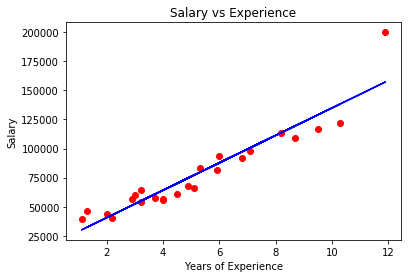

In [31]:
plot.scatter(expTrain, salaryTrain, color = 'red')
plot.plot(expTrain,linearRegressor.predict(expTrain), color = 'blue')
plot.title('Salary vs Experience')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

### Baseline model created 

### But first let us create function

In [32]:
def model_linear(xTrain, xVal, yTrain, yVal):
    global linearRegressor
    linearRegressor = LinearRegression()
    linearRegressor.fit(xTrain, yTrain)
    yPrediction = linearRegressor.predict(xVal)
    plot.scatter(xTrain, yTrain, color = 'red')
    plot.plot(xTrain,linearRegressor.predict(xTrain), color = 'blue')
    plot.title('Salary vs Experience (Training set)')
    plot.xlabel('Years of Experience')
    plot.ylabel('Salary')
    plot.show()
    print('Root Mean Squared Error :' )
    return np.sqrt(mean_squared_error(yVal, yPrediction))


### 6. Improve the model

### Feature Engineering

### HR generally offers salary based on rounded number, integers - 1 yrs or 2 yrs experience 
### 1.  Let us round off experience
### 2. Remove the suspicious Data - CEO's Salary
### Train and validate again

In [33]:
data.tail()

,YearsExperience,Salary
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872
30,11.9,200000


In [34]:
data = data.iloc[:30,:]

In [35]:
# Create Independent variable
exp = data.iloc[:, 0].values


# Create dependent variable
salary = data.iloc[:, 1].values 

In [36]:
# Experience
exp

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [37]:
# Round Experience
exp = np.round(exp,0)

In [38]:
exp

array([ 1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,
        4.,  4.,  5.,  5.,  5.,  6.,  6.,  7.,  7.,  8.,  8.,  9.,  9.,
       10., 10., 10., 10.])

In [39]:
# Split our data again
expTrain, expVal, salaryTrain, salaryVal = train_test_split(exp, salary, test_size = 0.2, random_state = 0)

In [40]:
# Converting to data frame 2D
(expTrain,expVal) = (pd.DataFrame(expTrain),pd.DataFrame(expVal))

In [41]:
# Sanity Check
expTrain.shape,expVal.shape

((24, 1), (6, 1))

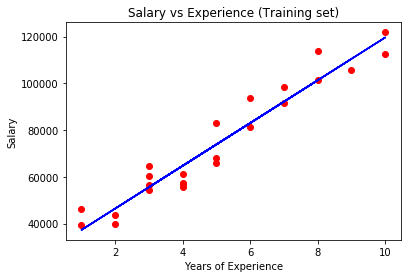

Root Mean Squared Error :


5041.08726482858

In [42]:
# Let us check if it improves
model_linear(xTrain = expTrain , xVal = expVal , yTrain = salaryTrain, yVal = salaryVal)

In [43]:
salaryVal

array([ 37731, 122391,  57081,  63218, 116969, 109431], dtype=int64)

In [44]:
linearRegressor.predict(expVal)

array([ 46434.83638211, 119638.4949187 ,  64735.75101626,  64735.75101626,
       119638.4949187 , 110488.03760163])

In [45]:
### Such great Experience 
# Base line model  12K   
# Removing Suspiciuos data and rounding the experience 5K

### Training done .. Let us predict on experience information and send to HR

In [47]:
# Load our test / Experience data
experience = pd.read_csv('yearsofexperince.csv')

In [48]:
experience

,experience
0,7.6
1,4.0


In [49]:
experience.shape

(2, 1)

In [50]:
experience = np.round(experience)

In [51]:
experience

,experience
0,8.0
1,4.0


In [52]:
linearRegressor.predict(experience)

array([101337.58028455,  64735.75101626])

## Now HR can negotiate on Salary
#### 8 yrs of Experience - 1,01,337 /month + Other variables
#### 4 yrs of Experience - 64,735 / month + Other variables